In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
#only consider income and spending score
X = dataset.iloc[:, [3,4]].values

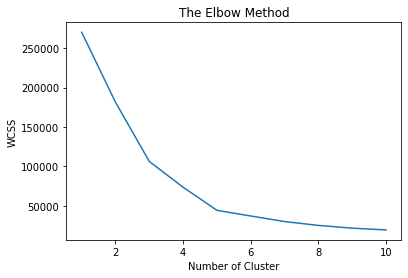

In [3]:
#use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
#calculate: within cluster sum of squares (wcss)
wcss = []
#loop through different numbers of clusters: from 1 to 10
for i in range(1, 11):
    #use k-means++ to prevent random initialization trap
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    #the attribute 'inertia' (from the object kmeans) gives us the wcss value
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [4]:
#training the model
#fit_predict returns the clusters (dependent variable), that 
#separates customers in different groups
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

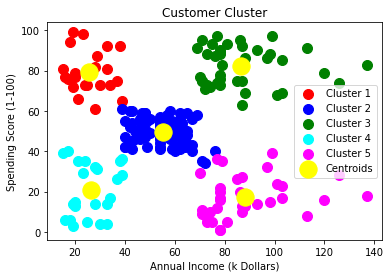

In [5]:
#k_means == 0: we only select customers where the index is 0
#the 0 after the comma means: we select the annual income
#the 1 after the comma means: we select the spending score
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#show the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer Cluster')
plt.xlabel('Annual Income (k Dollars)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = 'best')
plt.show()

In [6]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#do one-hote encoding on gender column
X = pd.get_dummies(dataset)

In [8]:
X.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [9]:
#consider all features
X_all = X.iloc[:, 1:].values

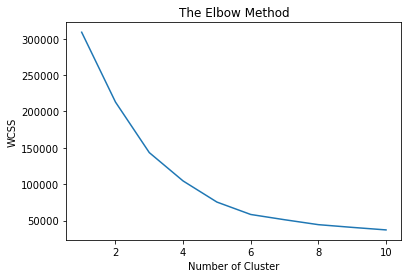

In [10]:
#use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
#calculate: within cluster sum of squares (wcss)
wcss = []
#loop through different numbers of clusters: from 1 to 10
for i in range(1, 11):
    #use k-means++ to prevent random initialization trap
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_all)
    #the attribute 'inertia' (from the object kmeans) gives us the wcss value
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [11]:
#training the model
#fit_predict returns the clusters (dependent variable), that 
#separates customers in different groups
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_all)

In [12]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [14]:
i = 0
age = []
income = []
spending = []
female = []
male =[]
while i < 5:
    age.append(X_all[:, 0][y_kmeans == i].mean())
    income.append(X_all[:, 1][y_kmeans == i].mean())
    spending.append(X_all[:, 2][y_kmeans == i].mean())
    female.append(X_all[:, 3][y_kmeans == i].mean())
    male.append(X_all[:, 4][y_kmeans == i].mean())
    i = i + 1
data_tuples = list(zip(age, income, spending, female, male))
data_tuples
pd.DataFrame(data_tuples, columns = ['Age', 'Income', 'Spending Score', 'Ratio Females', 'Ratio Males'])
    

,Age,Income,Spending Score,Ratio Females,Ratio Males
0,40.666667,87.750000,17.583333,0.472222,0.527778
1,43.088608,55.291139,49.569620,0.582278,0.417722
2,25.521739,26.304348,78.565217,0.608696,0.391304
3,32.692308,86.538462,82.128205,0.538462,0.461538
4,45.217391,26.304348,20.913043,0.608696,0.391304
